# Pre-processing

## Checking metrics for clearing and clustering

In [8]:
import yaml

def load_yaml(file_path):
    """Load a YAML file and return its content."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

def extract_names_and_synonyms(data, key):
    """
    Extract names and synonyms from a clustered YAML structure.
    
    Args:
        data (dict): Data structure containing clustered data.
        key (str): Key for the cluster, e.g., 'clustered_metrics' or 'clustered_methods'.
    
    Returns:
        set: A set of all names and synonyms.
    """
    items = set()
    for cluster in data.get(key, []):
        for item in cluster.get(key[:-1], []):  # dynamically access 'metric' or 'method'
            items.add(item.get('name'))
            items.update(item.get('synonyms', []))
    return items

def extract_items_from_papers(data, item_type):
    """
    Extract all unique items (metrics or methods) from the 'papers' section.
    
    Args:
        data (dict): Data structure containing the 'papers' section.
        item_type (str): 'metrics' or 'methods'.
    
    Returns:
        set: A set of unique items found in the papers.
    """
    return {item for paper in data.get('papers', []) for item in paper.get(item_type, [])}

def main():
    metrics_yaml_path = "dictionaries/metrics.yml"
    papers_yaml_path = "papers.yml"
    
    # Load YAML data
    metrics_data = load_yaml(metrics_yaml_path)
    papers_data = load_yaml(papers_yaml_path)
    
    # Extract metrics
    extracted_metrics = extract_items_from_papers(papers_data, 'metrics')
    yaml_metrics = extract_names_and_synonyms(metrics_data, 'clustered_metrics')
    
    # Find missing metrics
    missing_metrics = extracted_metrics - yaml_metrics
    
    # Output results
    print("All Metrics (from papers):")
    print("\n".join(sorted(extracted_metrics)))
    
    print("\nMetrics not in the YAML:")
    print("\n".join(sorted(missing_metrics)))

if __name__ == "__main__":
    main()

All Metrics (from papers):
Actual amount of foreign capital used in the current year
Actual amount of foreign investment used in the year
Actual amount of foreign investment utilized
Actual utilization of foreign direct investment amount
Added value of the secondary industry as a proportion of GDP
Added value of the tertiary industry as a proportion of GDP
Administrative area land area
Advanced industrial structure index
Advanced level of industrial structure
Amount of foreign capital utilized
Amount of foreign capital utilized in the current year
Annual growth rate of fixed asset investment
Annual output value of tertiary industry
Annual percentage growth rate of GDP
Average wage of employees
Average wage of on-the-job workers
Balance of savings deposits per capita
Degree of resource depletion
Dependence on foreign trade
Dependence on foreign trade (Total imports and exports/GDP)
Deposit balance of financial institutions
Development intensity of construction land per 10,000 GDP
Digita

## Checking methods for clearing and clustering

In [9]:
import yaml

def load_yaml(file_path):
    """Load YAML content from a file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

def extract_names_and_synonyms(data, key):
    """
    Extract names and synonyms from a clustered YAML structure.
    
    Args:
        data (dict): Data structure containing clustered data.
        key (str): Key for the cluster, e.g., 'clustered_metrics' or 'clustered_methods'.
    
    Returns:
        set: A set of all names and synonyms.
    """
    items = set()
    for cluster in data.get(key, []):
        for item in cluster.get(key[:-1], []):  # dynamically access 'metric' or 'method'
            items.add(item.get('name'))
            items.update(item.get('synonyms', []))
    return items

def extract_items_from_papers(data, item_type):
    """
    Extract all unique items (metrics or methods) from the 'papers' section.
    
    Args:
        data (dict): Data structure containing the 'papers' section.
        item_type (str): 'metrics' or 'methods'.
    
    Returns:
        set: A set of unique items found in the papers.
    """
    return {item for paper in data.get('papers', []) for item in paper.get(item_type, [])}

def main():
    methods_yaml_path = "dictionaries/methods.yml"
    papers_yaml_path = "papers.yml"
    
    # Load YAML data
    methods_data = load_yaml(methods_yaml_path)
    papers_data = load_yaml(papers_yaml_path)
    
    # Extract methods
    extracted_methods = extract_items_from_papers(papers_data, 'methods')
    yaml_methods = extract_names_and_synonyms(methods_data, 'clustered_methods')
    
    # Find missing methods
    missing_methods = extracted_methods - yaml_methods
    
    # Output results
    print("All Methods (from papers):")
    print("\n".join(sorted(extracted_methods)))
    
    print("\nMethods not in the YAML:")
    print("\n".join(sorted(missing_methods)))

if __name__ == "__main__":
    main()

All Methods (from papers):
Adaptive cycle theory
ArcGIS for resilience visualization
Bartlett's test of sphericity
CRITIC and EWM combined weighting model
CRITIC–TOPSIS weighted evaluation model
Coefficient of variation method (CV)
Combination weight method
Combined weight model
Complex network approach
Coupling coordination degree (CCD) analysis
Coupling coordination degree (CCD) model
Coupling coordination degree model
Coupling coordination model
Dagum's Gini coefficient
Driving-Pressure-State-Response (DPSR) model
Entropy method
Entropy method for three-level indicator weighting
Entropy method for urban resilience index calculation
Entropy value method
Entropy weight method
Entropy weight method (EWM)
Entropy weight method (Shannon, 1948)
Entropy weight method with time series weights
Entropy weight-TOPSIS method
Evaluation functions for persistence, adaptability, and transformation
Exploratory Spatial Data Analysis (ESDA)
Extreme value entropy method
Fuzzy logic reasoning method
Ge

## Clear and cluster papers

In [10]:
from collections import defaultdict
import yaml

# --- Utility Functions --- #
def load_yaml(file_path):
    """Load YAML data from a file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

def save_yaml(data, file_path):
    """Save YAML data to a file."""
    with open(file_path, 'w', encoding='utf-8') as file:
        yaml.dump(data, file, allow_unicode=True, sort_keys=False)

# --- Map Items to Categories --- #
def map_items_to_categories(cluster_data, items_list, item_key):
    """
    Map items to their categories based on cluster data.

    Args:
        cluster_data (list): Cluster definitions with categories.
        items_list (list): List of items to categorize.
        item_key (str): Key in the cluster data ('metrics' or 'methods').

    Returns:
        dict: Categorized items as {category: [items]}.
    """
    categorized_items = defaultdict(list)

    for item in items_list:
        matched = False  # Track if the item is matched to a category
        for cluster in cluster_data:
            category = cluster['category']
            for definition in cluster[item_key]:
                # Normalize strings to lowercase for comparison
                item_normalized = item.lower()
                name_normalized = definition['name'].lower()
                synonyms_normalized = [syn.lower() for syn in definition.get('synonyms', [])]

                # Match item against the name or synonyms
                if item_normalized == name_normalized or item_normalized in synonyms_normalized:
                    categorized_items[category].append(definition['name'])  # Use the primary name
                    matched = True
                    break
            if matched:
                break
        if not matched:
            categorized_items["Uncategorized"].append(item)

    return categorized_items

# --- Process Papers --- #
def process_papers(clustered_metrics_path, clustered_methods_path, papers_path, output_path):
    """
    Process papers to categorize metrics and methods.

    Args:
        clustered_metrics_path (str): Path to clustered metrics YAML.
        clustered_methods_path (str): Path to clustered methods YAML.
        papers_path (str): Path to papers YAML.
        output_path (str): Path to save updated papers YAML.
    """
    # Load cluster data
    metrics_data = load_yaml(clustered_metrics_path)
    methods_data = load_yaml(clustered_methods_path)
    papers_data = load_yaml(papers_path)

    clustered_metrics = metrics_data.get('clustered_metrics', [])
    clustered_methods = methods_data.get('clustered_methods', [])

    if not clustered_metrics or not clustered_methods:
        raise ValueError("Clustered metrics or methods data is missing in YAML files.")

    # Process each paper
    for paper in papers_data.get('papers', []):
        for key, cluster_data in (("metrics", clustered_metrics), ("methods", clustered_methods)):
            if key in paper:
                categorized = map_items_to_categories(cluster_data, paper[key], key)
                # Replace the original list with the categorized structure
                paper[key] = [{'category': cat, 'items': items} for cat, items in categorized.items()]

    # Save updated papers
    save_yaml(papers_data, output_path)
    print(f"Updated papers saved to {output_path}")

# --- Main --- #
def main():
    clustered_metrics_path = "dictionaries/metrics.yml"
    clustered_methods_path = "dictionaries/methods.yml"
    papers_path = "papers.yml"
    output_path = "cleared_papers.yml"

    process_papers(clustered_metrics_path, clustered_methods_path, papers_path, output_path)

if __name__ == "__main__":
    main()

Updated papers saved to cleared_papers.yml


# Analysis

Average timespan: 12.10 years
Average start year: 2008
Average end year: 2019
Average metric count: 10.50

Most common methods:
  Entropy weight method: 12
  Coupling coordination model: 6
  Kernel density estimation: 3
  Obstacle degree model: 2
  Exploratory Spatial Data Analysis (ESDA): 2

Most common method categories:
  Weighting Models: 17
  Coupling Coordination Models: 6
  Index-based Methods: 5
  Spatial Analysis Tools: 5
  Regression and Mediation Models: 4

Most common metrics:
  GDP per capita: 22
  Proportion of the tertiary industry added value in GDP: 12
  Fixed asset investment: 10
  Urban per capita disposable income of residents: 8
  Per capita deposits in savings: 8
  Actual amount of foreign capital used: 7
  Per capita retail sales of consumer goods: 7
  Financial revenue: 6
  Dependence on foreign trade: 6
  Education expenditure: 5

Most common metric categories:
  Economic & Investment: 22
  Industrial & Structural: 20
  Finance & Revenue: 20
  Social & Living S

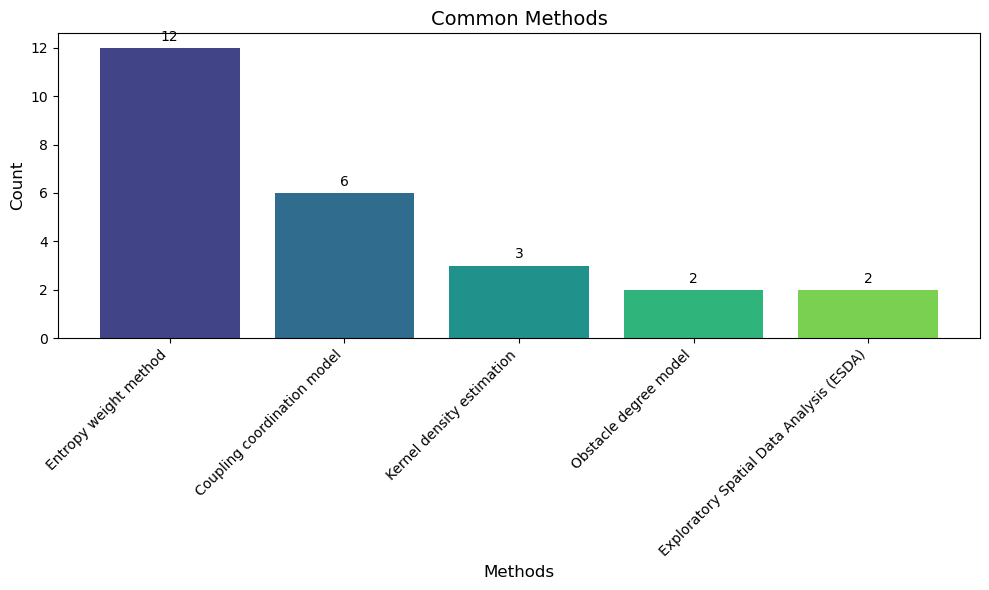

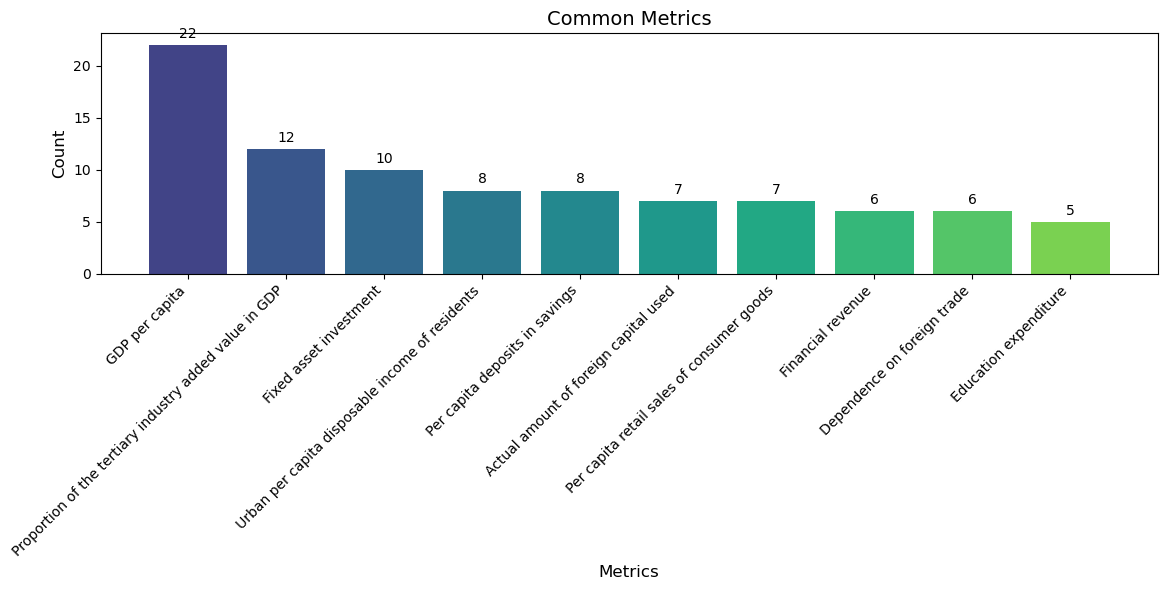

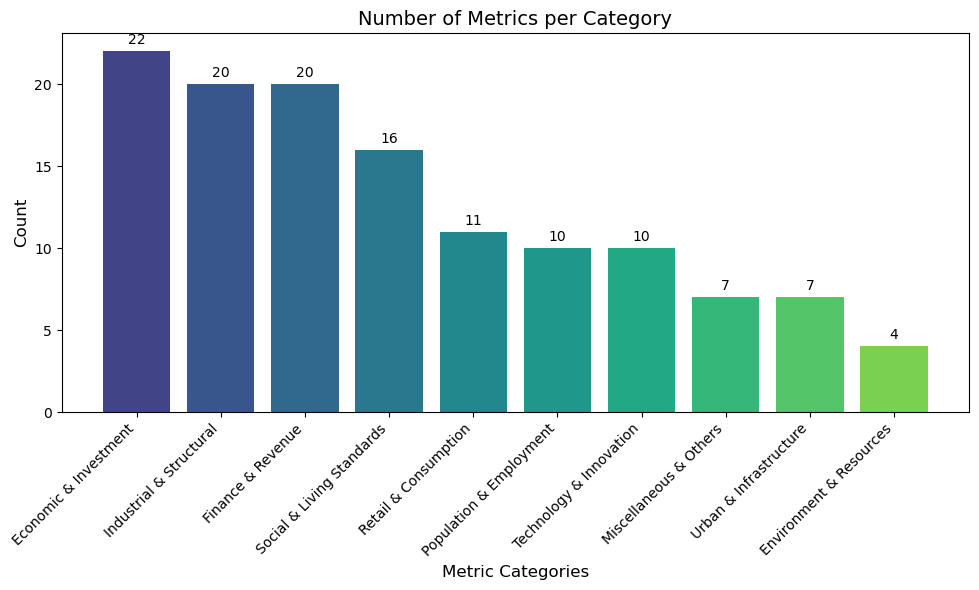

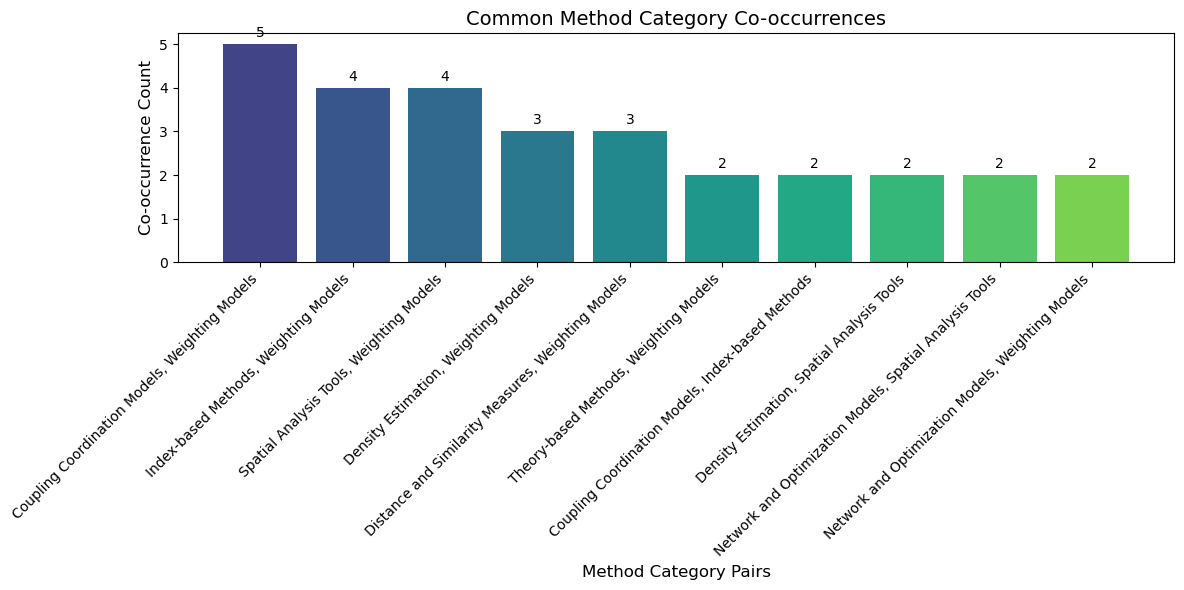

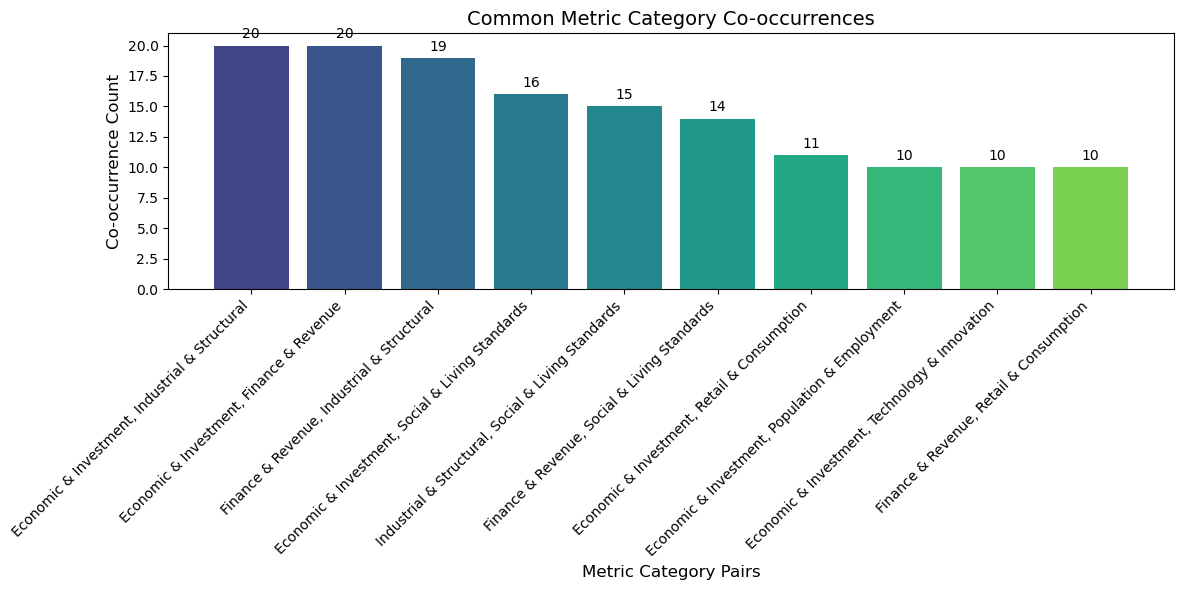

In [7]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

class PaperAnalyzer:
    """
    A class to analyze papers loaded from a YAML file, 
    extracting information about methods, metrics, and their co-occurrences.
    """

    def __init__(self, filename):
        """Initializes with the filename of the YAML data."""
        self.filename = filename
        self.papers = self.load_papers()
        (self.method_counter, self.method_cat_counter, self.metric_counter,
         self.metric_cat_counter, self.metric_cat_items, self.timespans,
         self.metric_counts, self.time_periods) = self.process_papers()

    def load_papers(self):
        """Load papers from a YAML file."""
        with open(self.filename, "r") as file:
            data = yaml.safe_load(file)
        return data["papers"]

    def extract_items(self, paper, key_type):
        """Extract items from methods or metrics based on key_type."""
        items = []
        for entry in paper.get(key_type, []):
            items.extend(entry["items"])
        return items

    def process_papers(self):
        """
        Process papers to collect counters and temporal information.
        Returns counters for methods, method categories, metrics, metric categories,
        a dictionary of metric category items, timespans, metric counts per paper, and time periods.
        """
        method_counter = Counter()
        method_cat_counter = Counter()
        metric_counter = Counter()
        metric_cat_counter = Counter()
        metric_cat_items = {}
        timespans, metric_counts, time_periods = [], [], []

        for paper in self.papers:
            # Process methods
            for method in paper.get("methods", []):
                method_cat_counter[method["category"]] += 1
                method_counter.update(method["items"])
            # Process metrics
            for metric in paper.get("metrics", []):
                cat = metric["category"]
                metric_cat_counter[cat] += 1
                metric_counter.update(metric["items"])
                metric_cat_items.setdefault(cat, Counter()).update(metric["items"])
            # Process temporal scope
            ts = paper.get("temporal_scope", [])
            if len(ts) > 1:
                start_year, end_year = ts[0], ts[-1]
                timespans.append(end_year - start_year + 1)
                time_periods.append((start_year, end_year))
            # Metric counts per paper
            metric_counts.append(sum(len(metric["items"]) for metric in paper.get("metrics", [])))
        
        return (method_counter, method_cat_counter, metric_counter, 
                metric_cat_counter, metric_cat_items, timespans, metric_counts, time_periods)

    def compute_cooccurrence(self, key_func, top_n=None):
        """
        Compute co-occurrence counts for items extracted by key_func from each paper.
        key_func: a function that takes a paper and returns an iterable of items.
        If top_n is provided, only the top_n items are returned.
        """
        cooccurrence = Counter()
        for paper in self.papers:
            items = list(set(key_func(paper)))  # Ensure unique items per paper
            cooccurrence.update(combinations(sorted(items), 2))
        return cooccurrence if top_n is None else Counter(dict(cooccurrence.most_common(top_n)))

    def plot_bar_chart(self, labels, values, title, xlabel, ylabel, cmap=plt.cm.viridis, figsize=(10, 6), rotation=45):
        """Generic bar chart plotting function."""
        colors = cmap(np.linspace(0.2, 0.8, len(labels)))
        plt.figure(figsize=figsize)
        bars = plt.bar(labels, values, color=colors)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.title(title, fontsize=14)
        plt.xticks(rotation=rotation, ha='right')
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=10)
        plt.tight_layout()
        plt.show()

    def print_counter(self, counter, title, top_n=5):
        """Print the top_n items from a counter with a title."""
        print(f"\n{title}:")
        for item, count in counter.most_common(top_n):
            print(f"  {item}: {count}")

    def analyze(self):
        """Main analysis function to compute statistics, co-occurrences, and generate plots."""
        # Calculate averages
        avg_timespan = np.mean(self.timespans) if self.timespans else 0
        avg_metric_count = np.mean(self.metric_counts)
        if self.time_periods:
            start_years, end_years = zip(*self.time_periods)
            avg_start_year = np.mean(start_years)
            avg_end_year = np.mean(end_years)
        else:
            avg_start_year = avg_end_year = None

        # Print basic statistics
        print(f"Average timespan: {avg_timespan:.2f} years")
        if avg_start_year is not None:
            print(f"Average start year: {avg_start_year:.0f}")
            print(f"Average end year: {avg_end_year:.0f}")
        print(f"Average metric count: {avg_metric_count:.2f}")

        self.print_counter(self.method_counter, "Most common methods", top_n=5)
        self.print_counter(self.method_cat_counter, "Most common method categories", top_n=5)
        self.print_counter(self.metric_counter, "Most common metrics", top_n=10)
        self.print_counter(self.metric_cat_counter, "Most common metric categories", top_n=len(self.metric_cat_counter))
        
        print("\nTop items per metric category:")
        for category, counter in self.metric_cat_items.items():
            print(f"Category: {category}")
            for item, count in counter.most_common(5):
                print(f"  {item}: {count}")

        # Compute co-occurrences
        # 1. Method-Metric Co-occurrence (individual items)
        mm_cooccurrence = self.compute_cooccurrence(
            key_func=lambda paper: self.extract_items(paper, "methods") + self.extract_items(paper, "metrics")
        )
        print("\nTop method-metric co-occurrences:")
        for pair, count in mm_cooccurrence.most_common(10):
            print(f"  {pair}: {count}")
        
        # 2. Method Category Co-occurrence
        mc_cooccurrence = self.compute_cooccurrence(
            key_func=lambda paper: [m["category"] for m in paper.get("methods", [])]
        )
        print("\nTop method category co-occurrences:")
        for pair, count in mc_cooccurrence.most_common(10):
            print(f"  {pair}: {count}")

        # 3. Metric Category Co-occurrence
        metric_cat_cooccurrence = self.compute_cooccurrence(
            key_func=lambda paper: [m["category"] for m in paper.get("metrics", [])]
        )
        print("\nTop metric category co-occurrences:")
        for pair, count in metric_cat_cooccurrence.most_common(10):
            print(f"  {pair}: {count}")

        # Generate bar charts
        if self.method_counter:
            labels, counts = zip(*self.method_counter.most_common(5))
            self.plot_bar_chart(labels, counts, "Common Methods", "Methods", "Count", cmap=plt.cm.viridis, figsize=(10, 6))
        
        if self.metric_counter:
            labels, counts = zip(*self.metric_counter.most_common(10))
            self.plot_bar_chart(labels, counts, "Common Metrics", "Metrics", "Count", cmap=plt.cm.viridis, figsize=(12, 6))
        
        if self.metric_cat_counter:
            labels, counts = zip(*self.metric_cat_counter.most_common())
            self.plot_bar_chart(labels, counts, "Number of Metrics per Category", "Metric Categories", "Count", cmap=plt.cm.viridis, figsize=(10, 6))
        
        if mc_cooccurrence:
            labels, counts = zip(*mc_cooccurrence.most_common(10))
            labels_str = [", ".join(pair) for pair in labels]
            self.plot_bar_chart(labels_str, counts, "Common Method Category Co-occurrences",
                           "Method Category Pairs", "Co-occurrence Count", cmap=plt.cm.viridis, figsize=(12, 6))

        if metric_cat_cooccurrence:
            labels, counts = zip(*metric_cat_cooccurrence.most_common(10))
            labels_str = [", ".join(pair) for pair in labels]
            self.plot_bar_chart(labels_str, counts, "Common Metric Category Co-occurrences",
                           "Metric Category Pairs", "Co-occurrence Count", cmap=plt.cm.viridis, figsize=(12, 6))

def main():
    analyzer = PaperAnalyzer("cleared_papers.yml")
    analyzer.analyze()

if __name__ == '__main__':
    main()

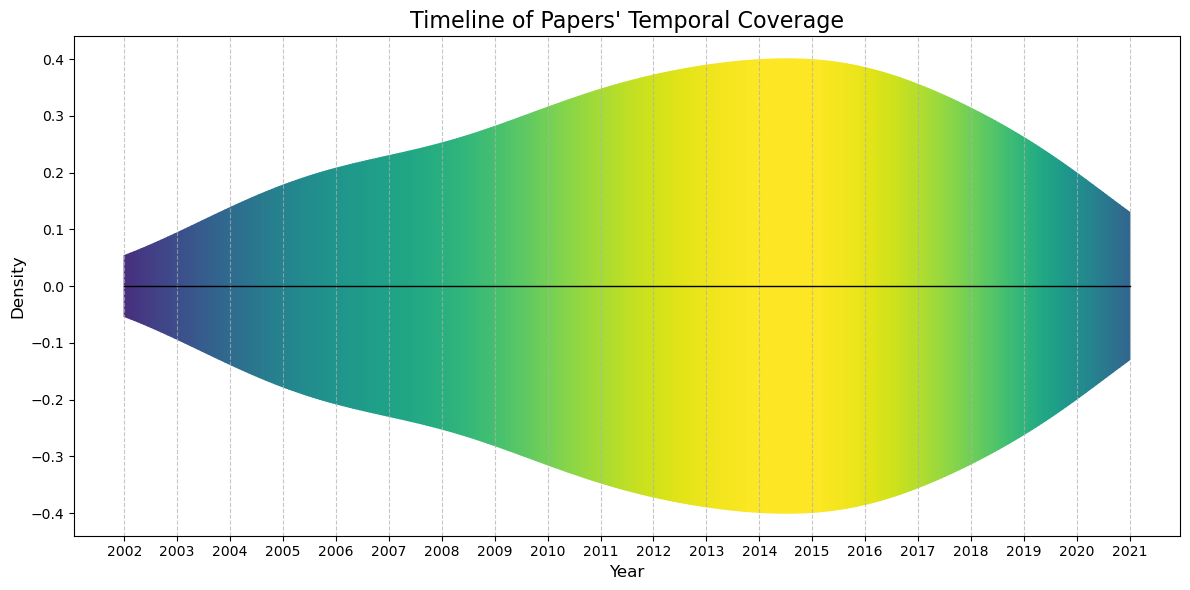

In [9]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

def load_papers_from_yaml(filename):
    """Load papers from a YAML file."""
    with open(filename, "r") as file:
        data = yaml.safe_load(file)
    return data["papers"]

def create_year_dataframe(papers):
    """Create a DataFrame from the temporal scopes of papers."""
    years = []
    for paper in papers:
        years.extend(paper["temporal_scope"])
    return pd.DataFrame({'Year': years})

def compute_kde(year_data, num_points=300):
    """Compute Kernel Density Estimate (KDE) for the given year data."""
    min_year = year_data.min()
    max_year = year_data.max()
    kde = gaussian_kde(year_data)
    x_grid = np.linspace(min_year, max_year, num_points)
    density = kde(x_grid)
    return x_grid, density, min_year, max_year

def create_gradient_violin_plot(x_grid, density, min_year, max_year, max_half_width=0.4):
    """Create a gradient-filled violin plot."""
    scaled_density = density / density.max() * max_half_width
    
    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    
    for i in range(len(x_grid) - 1):
        xs = [x_grid[i], x_grid[i+1], x_grid[i+1], x_grid[i]]
        ys = [-scaled_density[i], -scaled_density[i+1],
              scaled_density[i+1], scaled_density[i]]
        
        avg_density = (density[i] + density[i+1]) / 2
        norm_val = avg_density / density.max()
        color = plt.cm.viridis(norm_val)
        
        ax.fill(xs, ys, color=color, edgecolor=color)
    
    ax.plot([min_year, max_year], [0, 0], color='black', lw=1)
    
    ax.set_title("Timeline of Papers' Temporal Coverage", fontsize=16)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.grid(axis="x", linestyle="--", alpha=0.7)
    
    ax.set_xticks(np.arange(min_year, max_year + 1, 1))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()
    plt.show()

def main():
    """Main function to orchestrate the analysis and plotting."""
    papers = load_papers_from_yaml("cleared_papers.yml")
    data_for_plot = create_year_dataframe(papers)
    year_data = data_for_plot['Year'].values
    
    x_grid, density, min_year, max_year = compute_kde(year_data)
    create_gradient_violin_plot(x_grid, density, min_year, max_year)

if __name__ == "__main__":
    main()


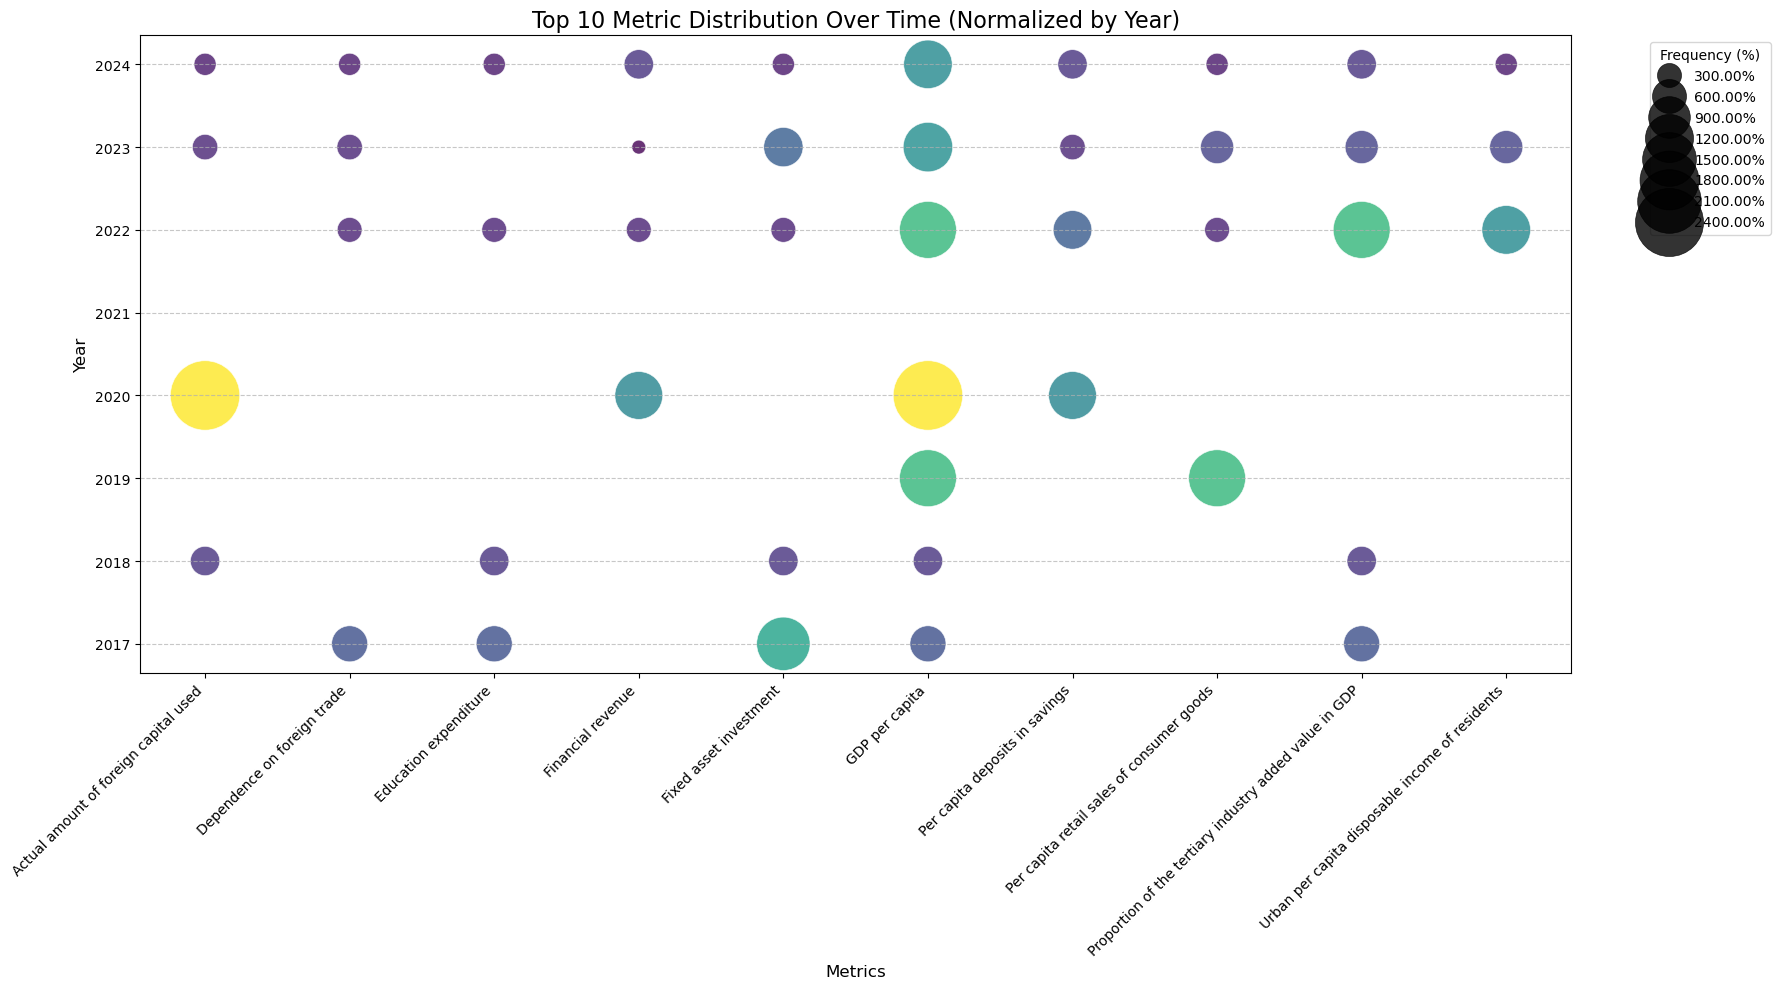

In [2]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def load_data(file_path):
    """Load data from YAML file."""
    with open(file_path, "r") as file:
        data = yaml.safe_load(file)
    return data.get("papers", [])

def extract_metric_years(papers):
    """Extract metrics and their corresponding years from papers."""
    metric_years = defaultdict(list)
    for paper in papers:
        year = paper.get("year")
        if not year:
            continue
        for metric in paper.get("metrics", []):
            for item in metric.get("items", []):
                metric_years[item].append(year)
    return metric_years

def create_dataframe(metric_years):
    """Create a DataFrame from the extracted metric-year data."""
    return pd.DataFrame(
        [(metric, year) for metric, years in metric_years.items() for year in years],
        columns=["Metric", "Year"]
    )

def prepare_plot_data(df_metrics, top_n=10):
    """Prepare data for the scatter plot, including normalization."""
    # Select the top N metrics
    top_metrics = df_metrics["Metric"].value_counts().nlargest(top_n).index
    df_top_metrics = df_metrics[df_metrics["Metric"].isin(top_metrics)]

    # Group by Metric and Year to get counts
    plot_data = df_top_metrics.groupby(["Metric", "Year"]).size().reset_index(name="Count")

    # Calculate total metrics per year
    total_metrics_per_year = df_metrics.groupby("Year").size().reset_index(name="Total_Metrics")

    # Merge total metrics with plot_data
    plot_data = plot_data.merge(total_metrics_per_year, on="Year")

    # Calculate normalized count (percentage)
    plot_data["Normalized_Count"] = plot_data["Count"] / plot_data["Total_Metrics"] * 100
    plot_data["Normalized_Count"] = plot_data["Normalized_Count"].round(2)  # Round for readability

    return plot_data

def create_scatter_plot(plot_data):
    """Create and display the scatter plot."""
    plt.figure(figsize=(16, 10))
    scatter = sns.scatterplot(
        data=plot_data,
        x="Metric",
        y="Year",
        size="Normalized_Count",
        sizes=(100, 2500),
        hue="Normalized_Count",
        palette="viridis",
        alpha=0.8,
        edgecolor="w",
        linewidth=0.5
    )

    # Generate legend for size
    collection = scatter.collections[0]
    handles, labels = collection.legend_elements(prop="sizes", alpha=0.8, fmt="{x:.2f}%")
    size_legend = plt.legend(handles, labels, title="Frequency (%)", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.gca().legend_.remove()
    plt.gca().add_artist(size_legend)

    # Adjust plot aesthetics
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Top 10 Metric Distribution Over Time (Normalized by Year)", fontsize=16)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    plt.show()

def main():
    """Main function to orchestrate the analysis and plotting."""
    papers = load_data("cleared_papers.yml")
    metric_years = extract_metric_years(papers)
    df_metrics = create_dataframe(metric_years)
    plot_data = prepare_plot_data(df_metrics)
    create_scatter_plot(plot_data)

if __name__ == "__main__":
    main()

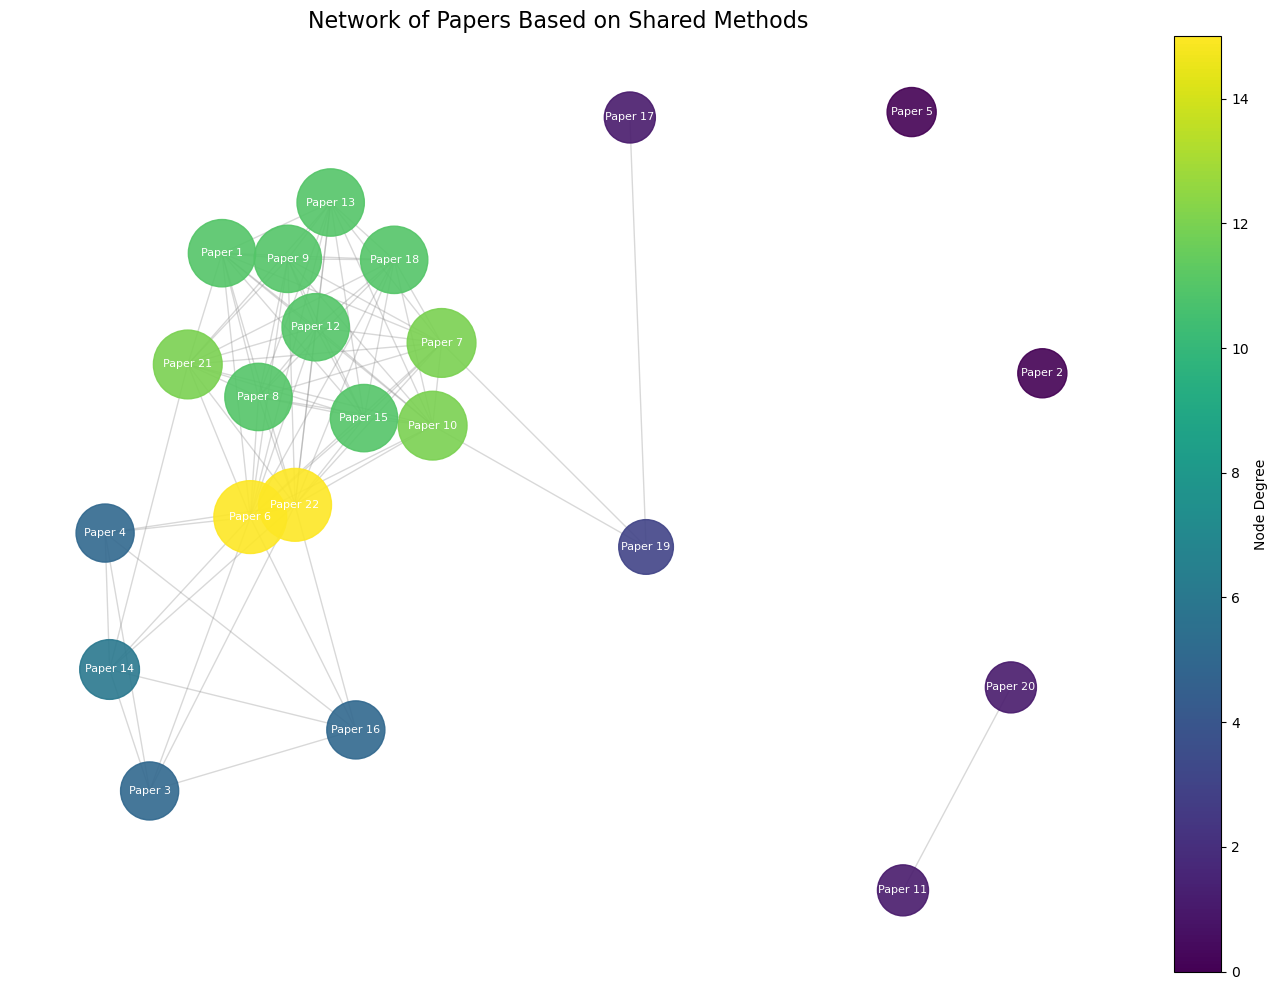

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from community import community_louvain
import yaml

def load_papers(filename):
    """Load papers from a YAML file."""
    with open(filename, "r") as file:
        data = yaml.safe_load(file)
    return data["papers"]

def create_bipartite_graph(papers):
    """Create a bipartite graph of papers and methods."""
    edges = []
    for paper in papers:
        paper_id = paper["id"]
        methods = [method for category in paper.get("methods", []) for method in category["items"]]
        for method in methods:
            edges.append((paper_id, method))
    
    B = nx.Graph()
    B.add_edges_from(edges)
    return B

def project_graph(B):
    """Project the bipartite graph into a unipartite graph of papers."""
    return nx.bipartite.projected_graph(B, [node for node in B.nodes if isinstance(node, int)])

def visualize_graph(papers_graph):
    """Visualize the paper graph with community detection and node coloring."""
    # Apply community detection (Louvain algorithm)
    communities = community_louvain.best_partition(papers_graph)

    # Generate positions for nodes using spring layout
    pos = nx.spring_layout(papers_graph, seed=42, k=5, iterations=300)

    # Calculate node degrees
    degrees = [papers_graph.degree(node) for node in papers_graph.nodes]

    # Normalize the degrees for coloring
    norm = Normalize(vmin=min(degrees), vmax=max(degrees))
    cmap = plt.cm.viridis
    node_colors = [cmap(norm(degree)) for degree in degrees]

    # Scale node sizes by degree
    node_sizes = [1250 + 100 * degree for degree in degrees]

    # Plot the graph
    plt.figure(figsize=(14, 10))

    # Draw edges with transparency
    nx.draw_networkx_edges(papers_graph, pos, alpha=0.3, edge_color="gray")

    # Draw nodes with viridis-based colors
    nx.draw_networkx_nodes(
        papers_graph,
        pos,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.9,
    )

    # Add labels to nodes
    labels = {node: f"Paper {node}" if isinstance(node, int) else node for node in papers_graph.nodes}
    nx.draw_networkx_labels(papers_graph, pos, labels, font_size=8, font_color="white")

    # Add colorbar for the viridis colormap
    fig = plt.gcf()
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=plt.gca(), orientation="vertical")
    cbar.set_label("Node Degree")

    # Adjust plot aesthetics
    plt.title("Network of Papers Based on Shared Methods", fontsize=16)
    plt.axis("off")
    plt.tight_layout()

    # Show the plot
    plt.show()

def main():
    """Main function to orchestrate the analysis and plotting."""
    papers = load_papers("cleared_papers.yml")
    B = create_bipartite_graph(papers)
    papers_graph = project_graph(B)
    visualize_graph(papers_graph)

if __name__ == "__main__":
    main()

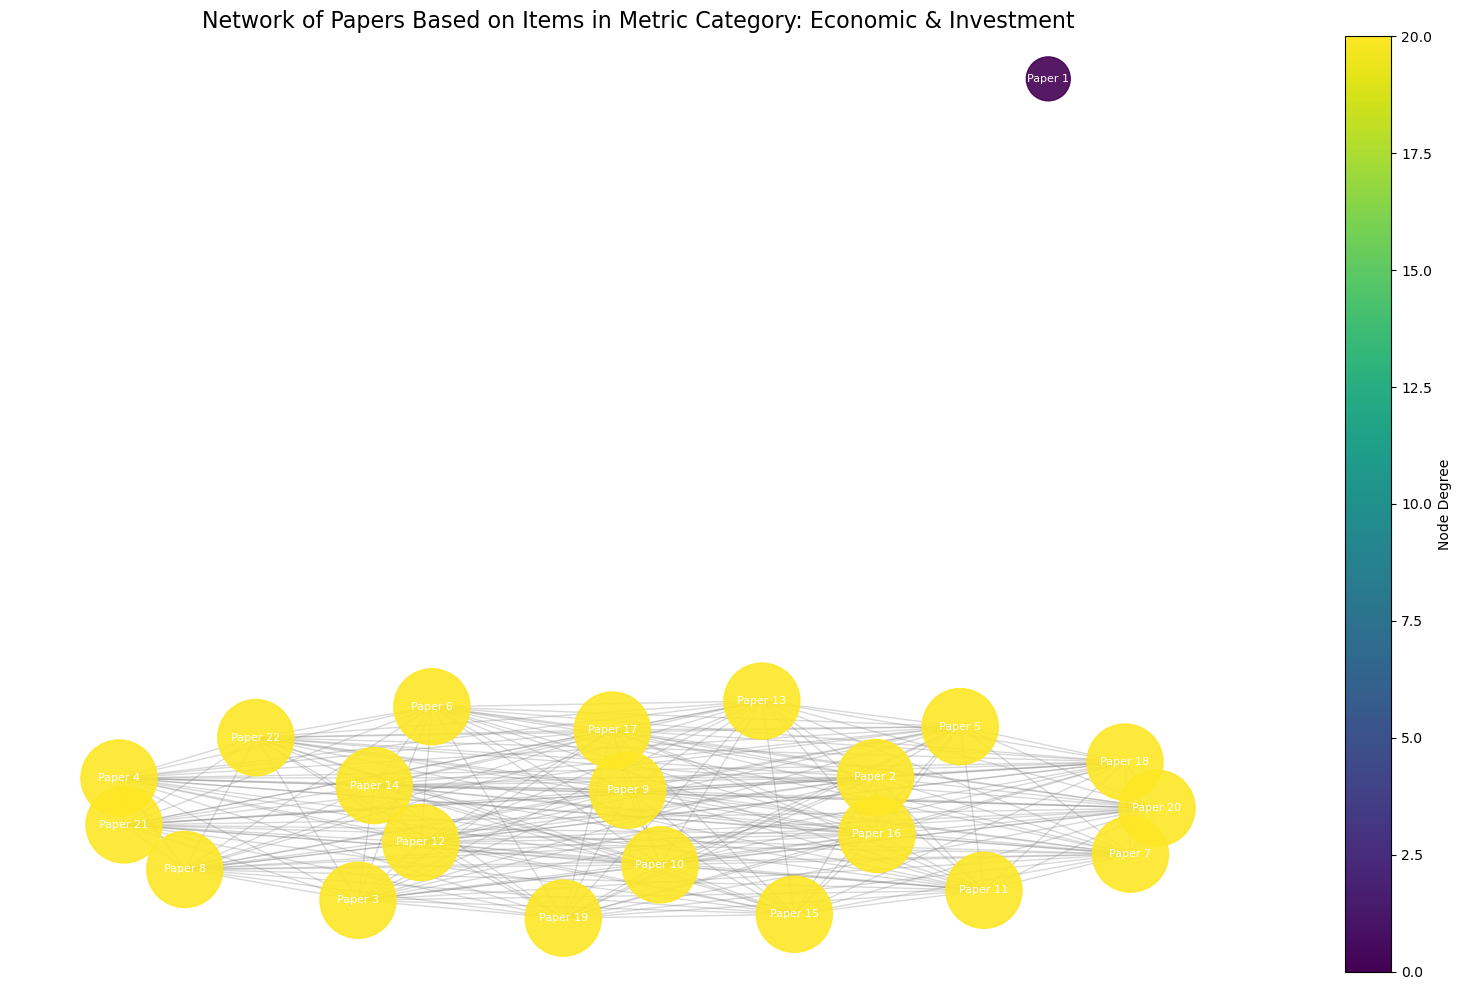

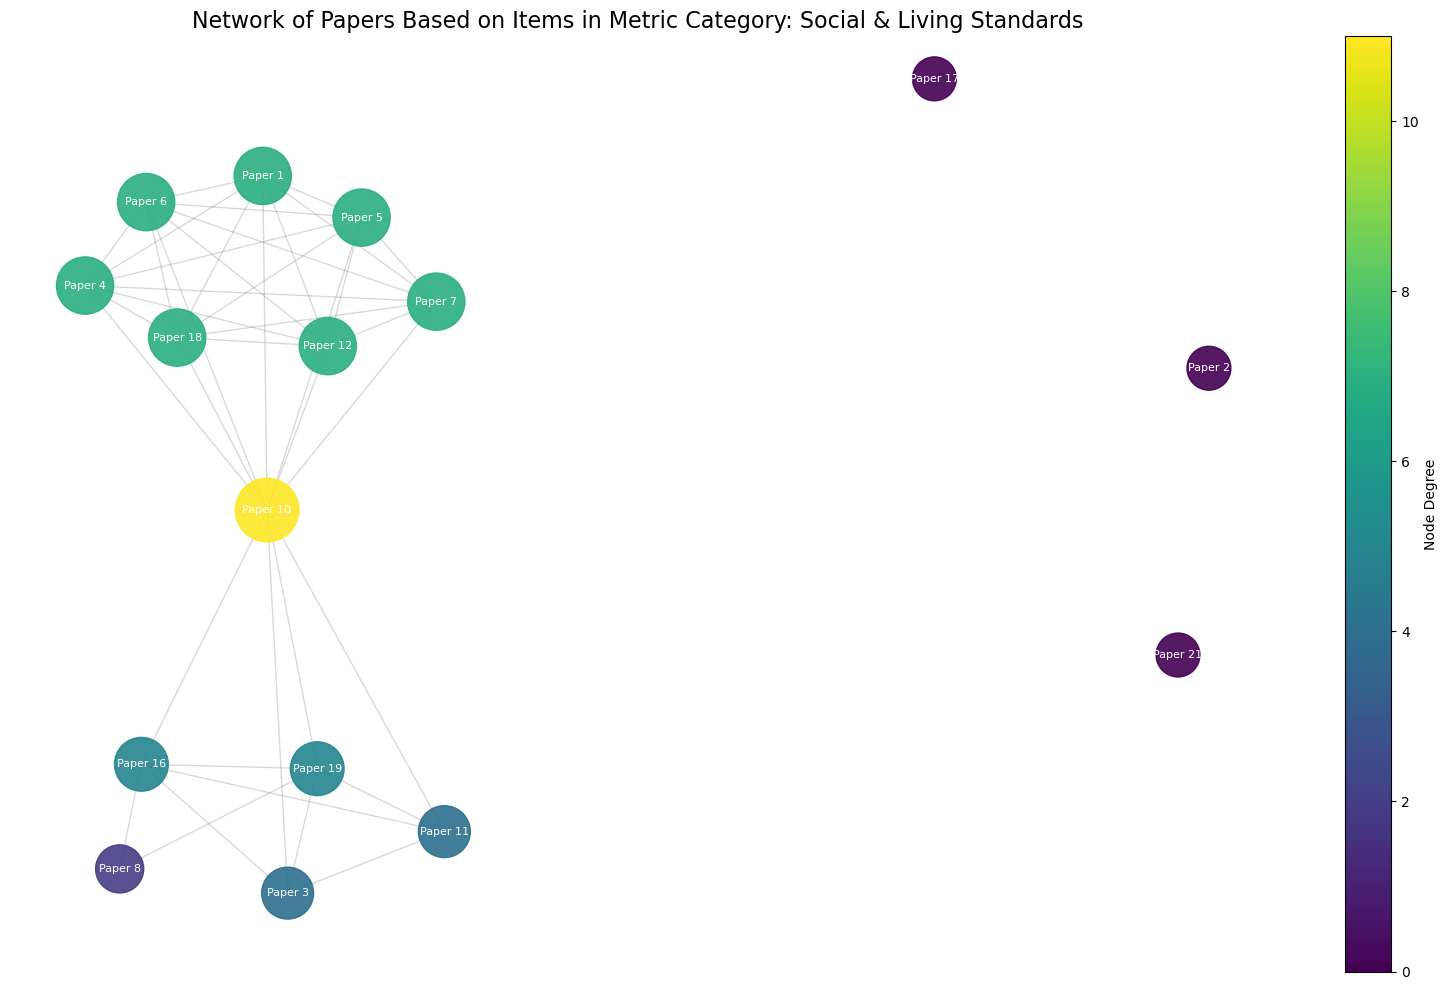

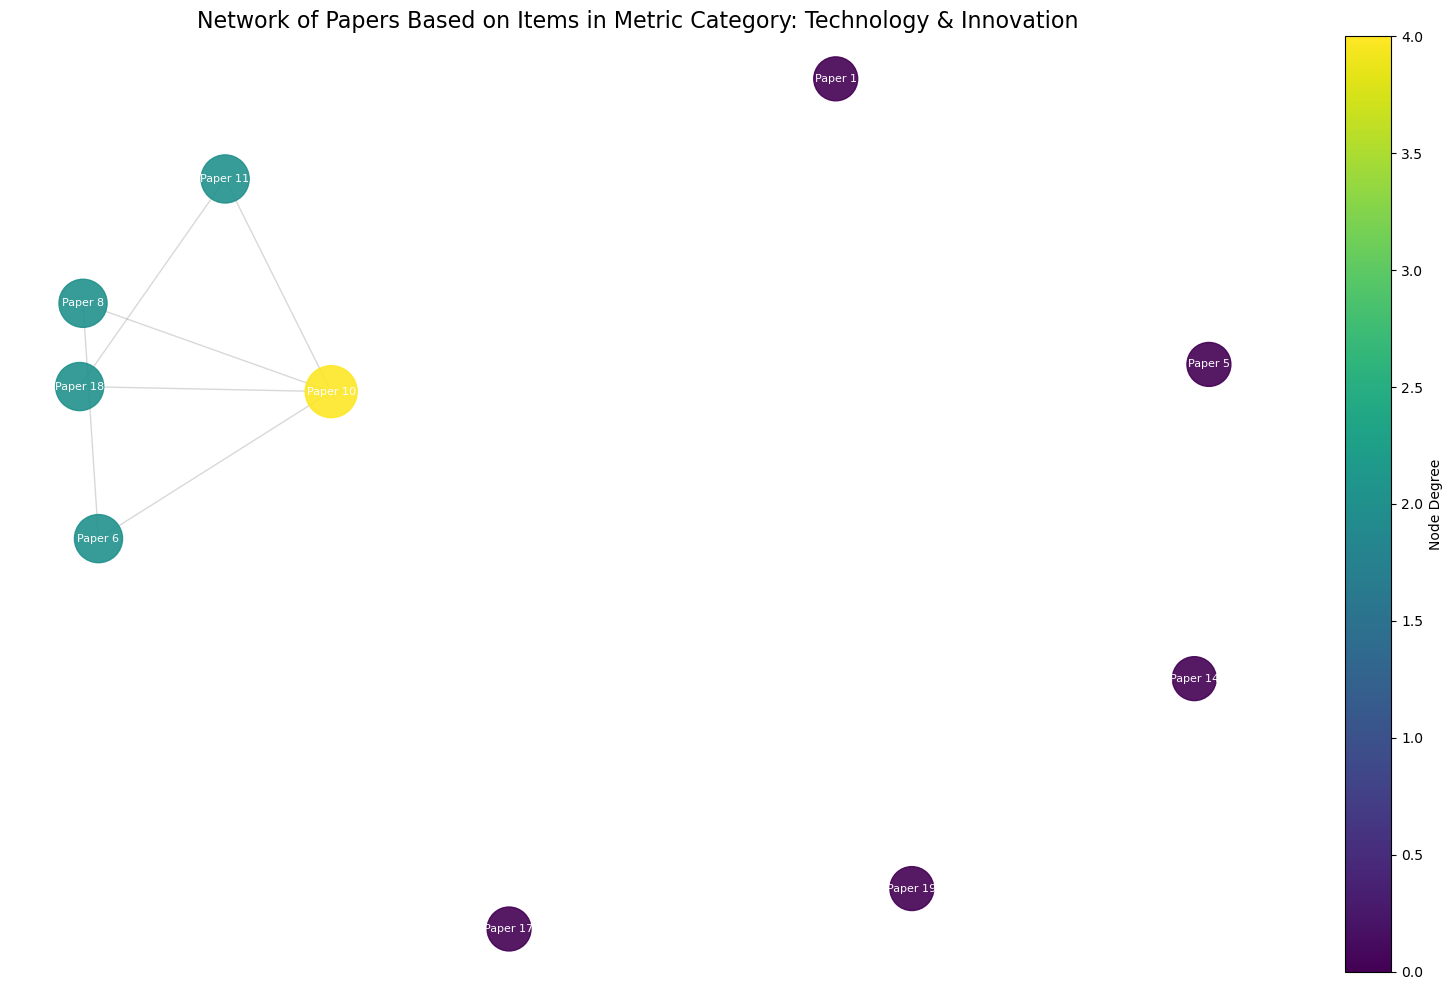

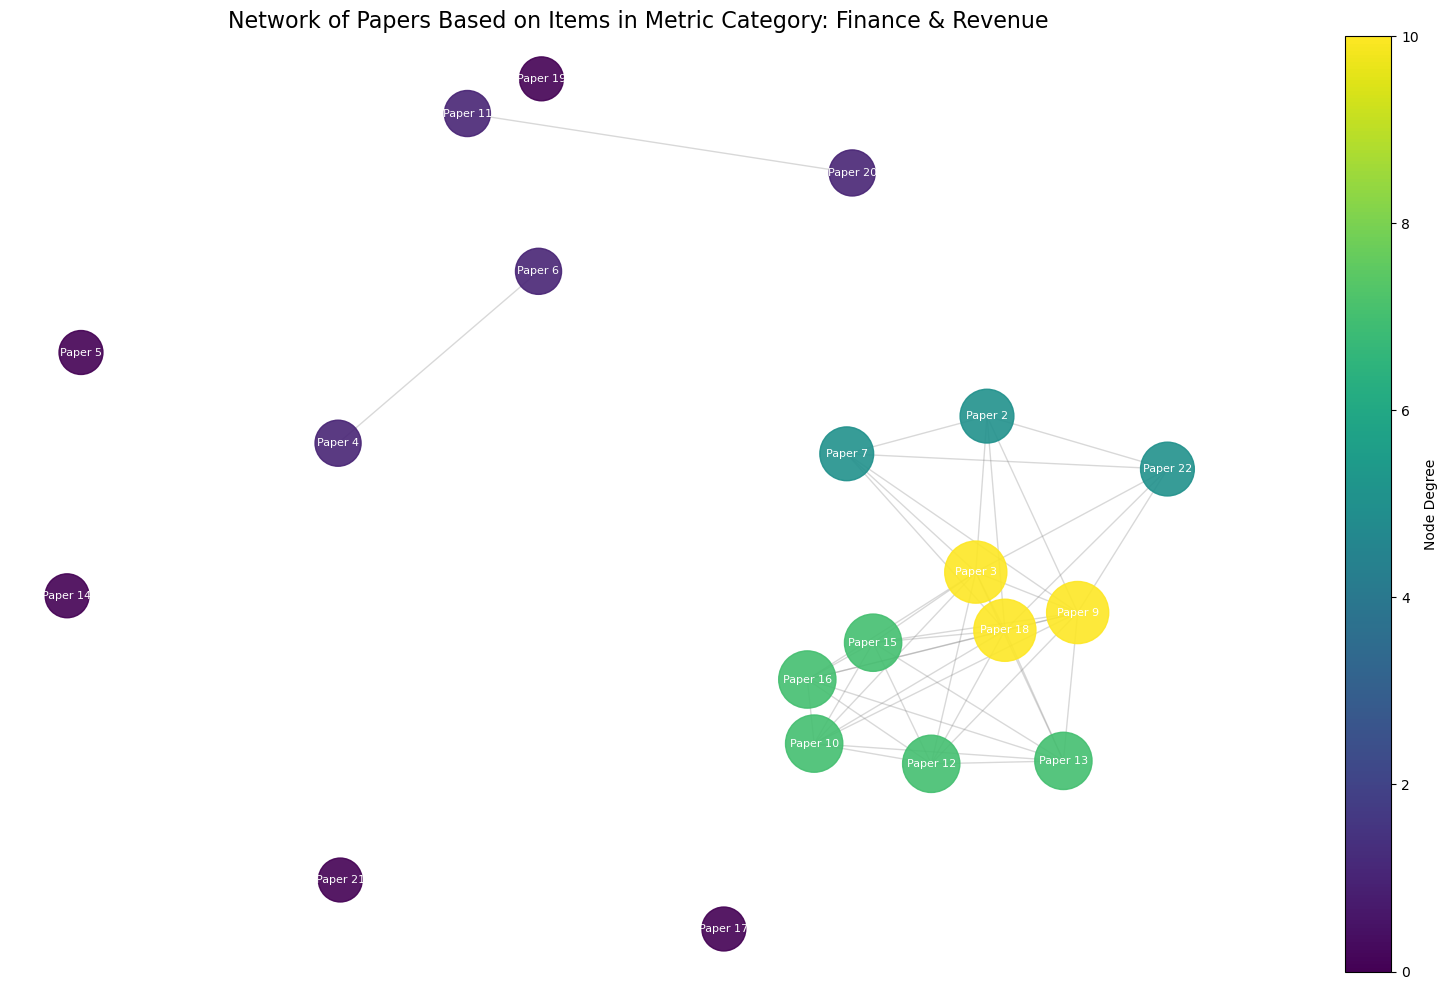

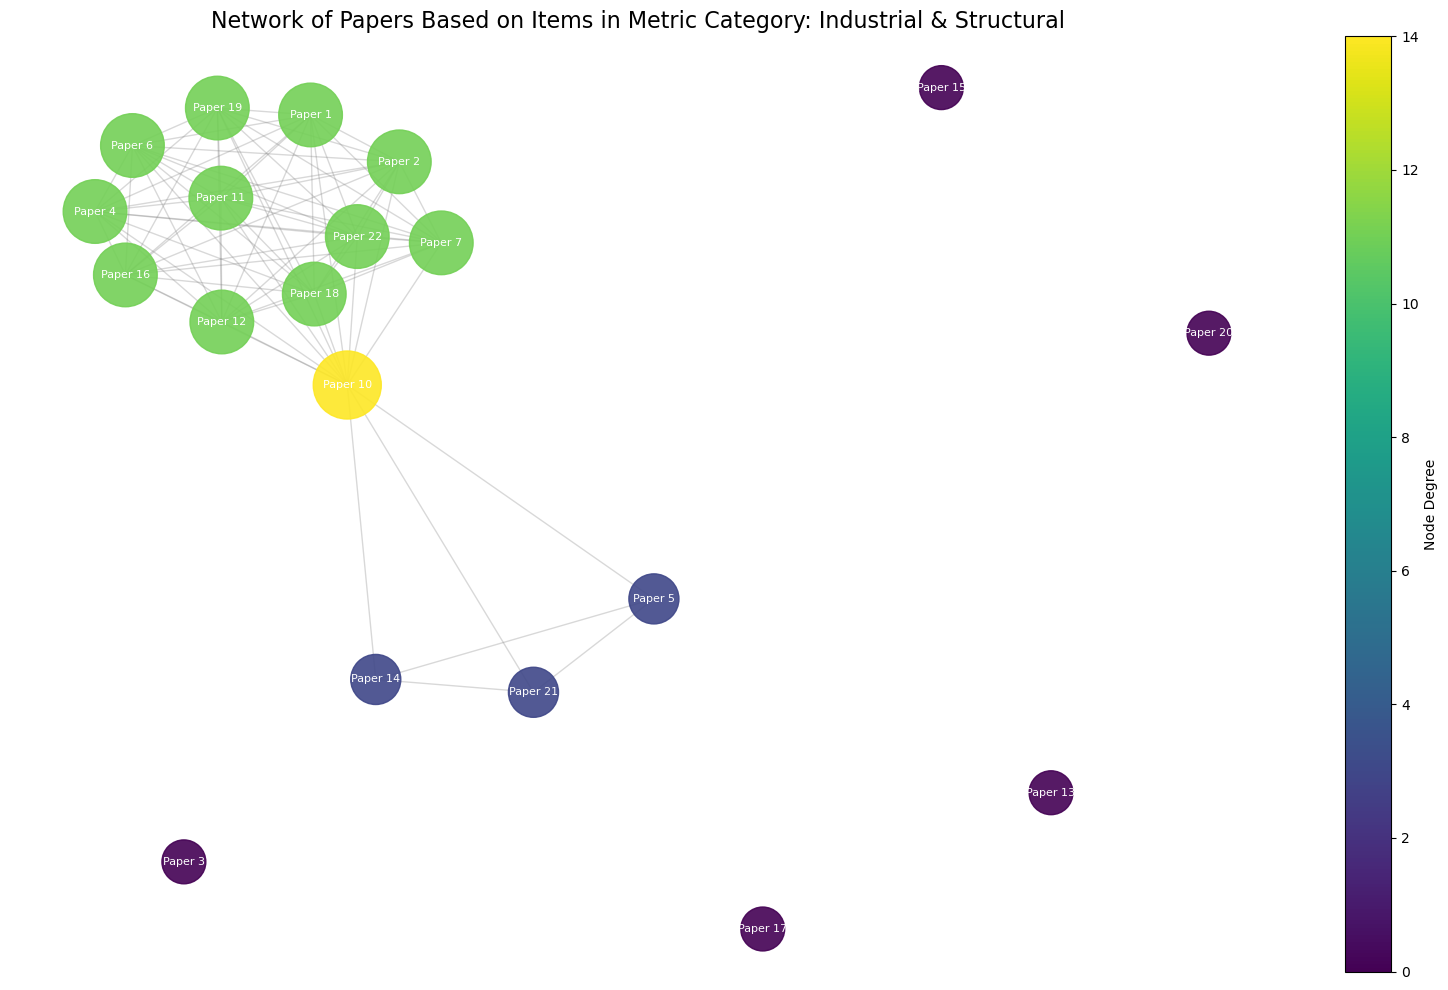

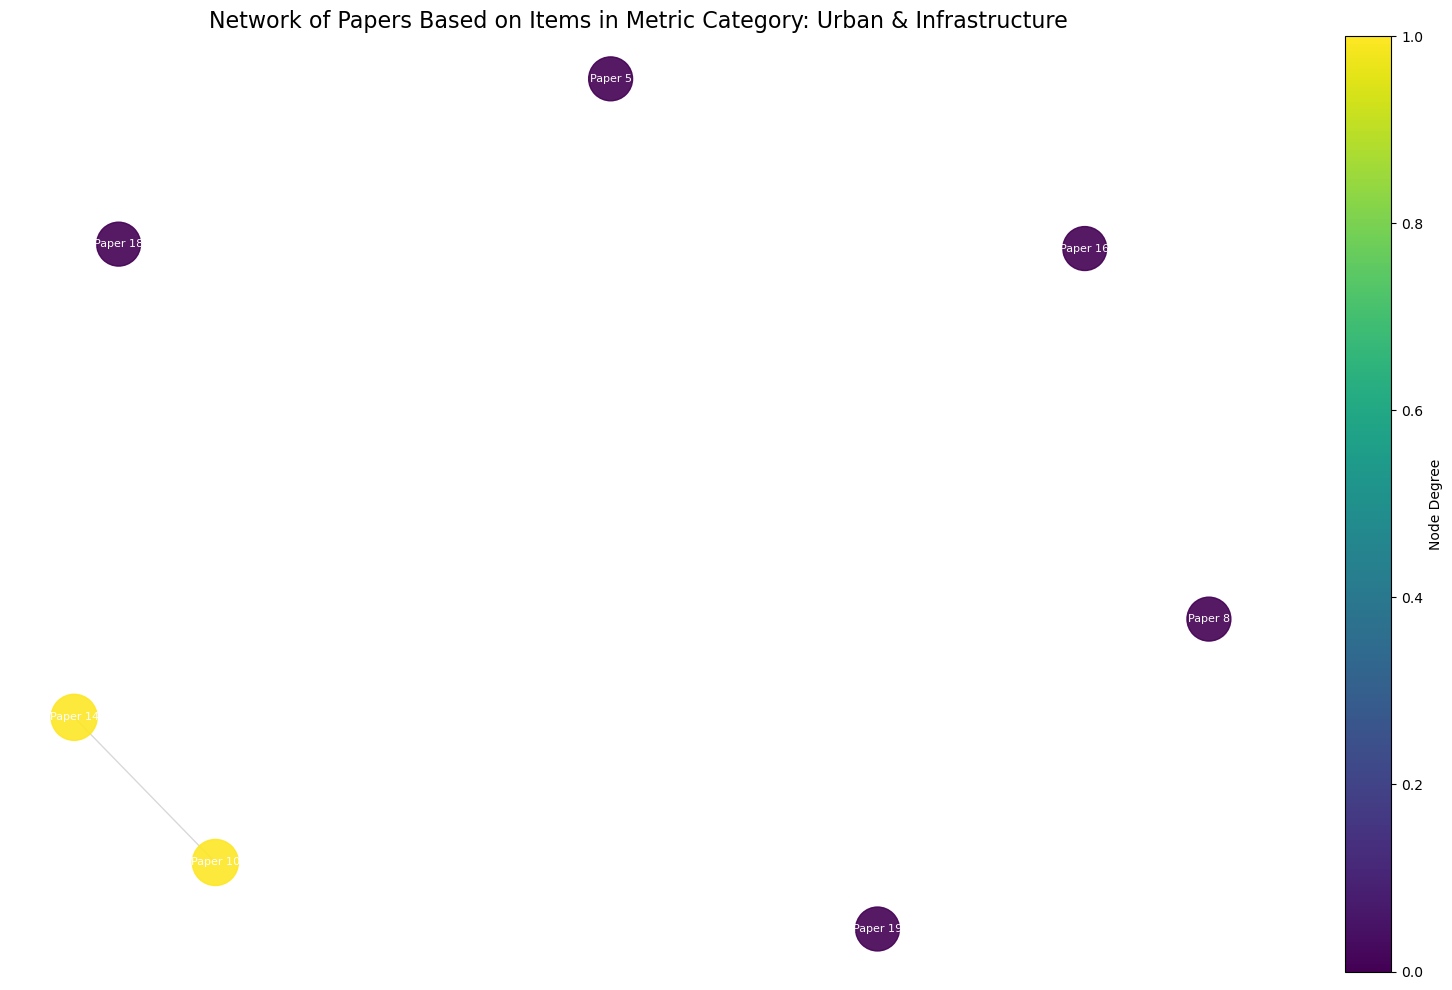

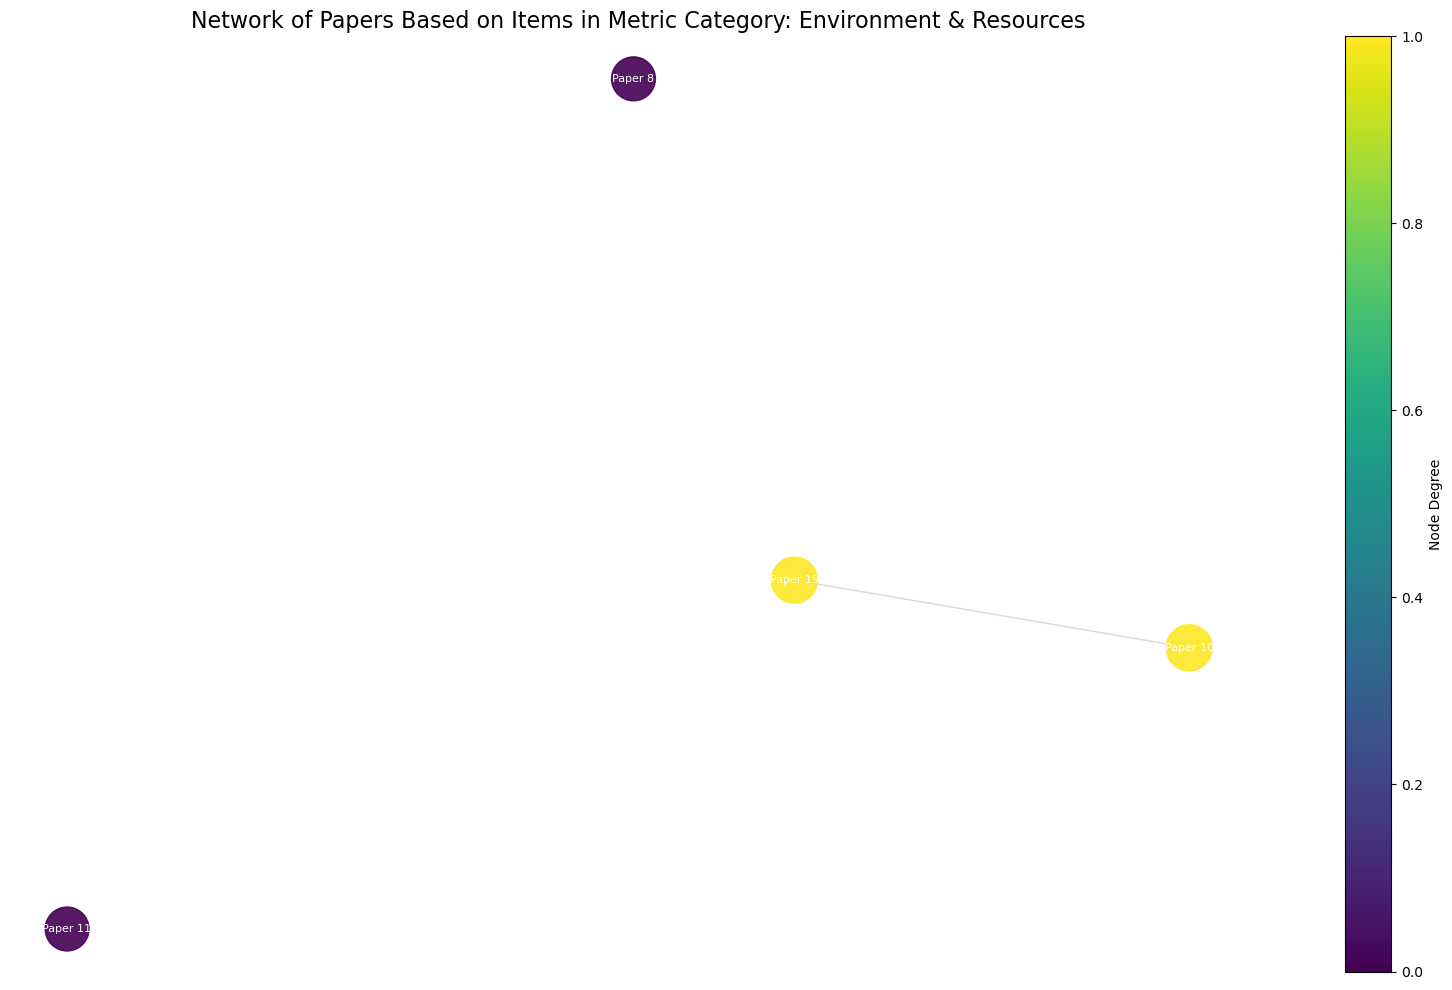

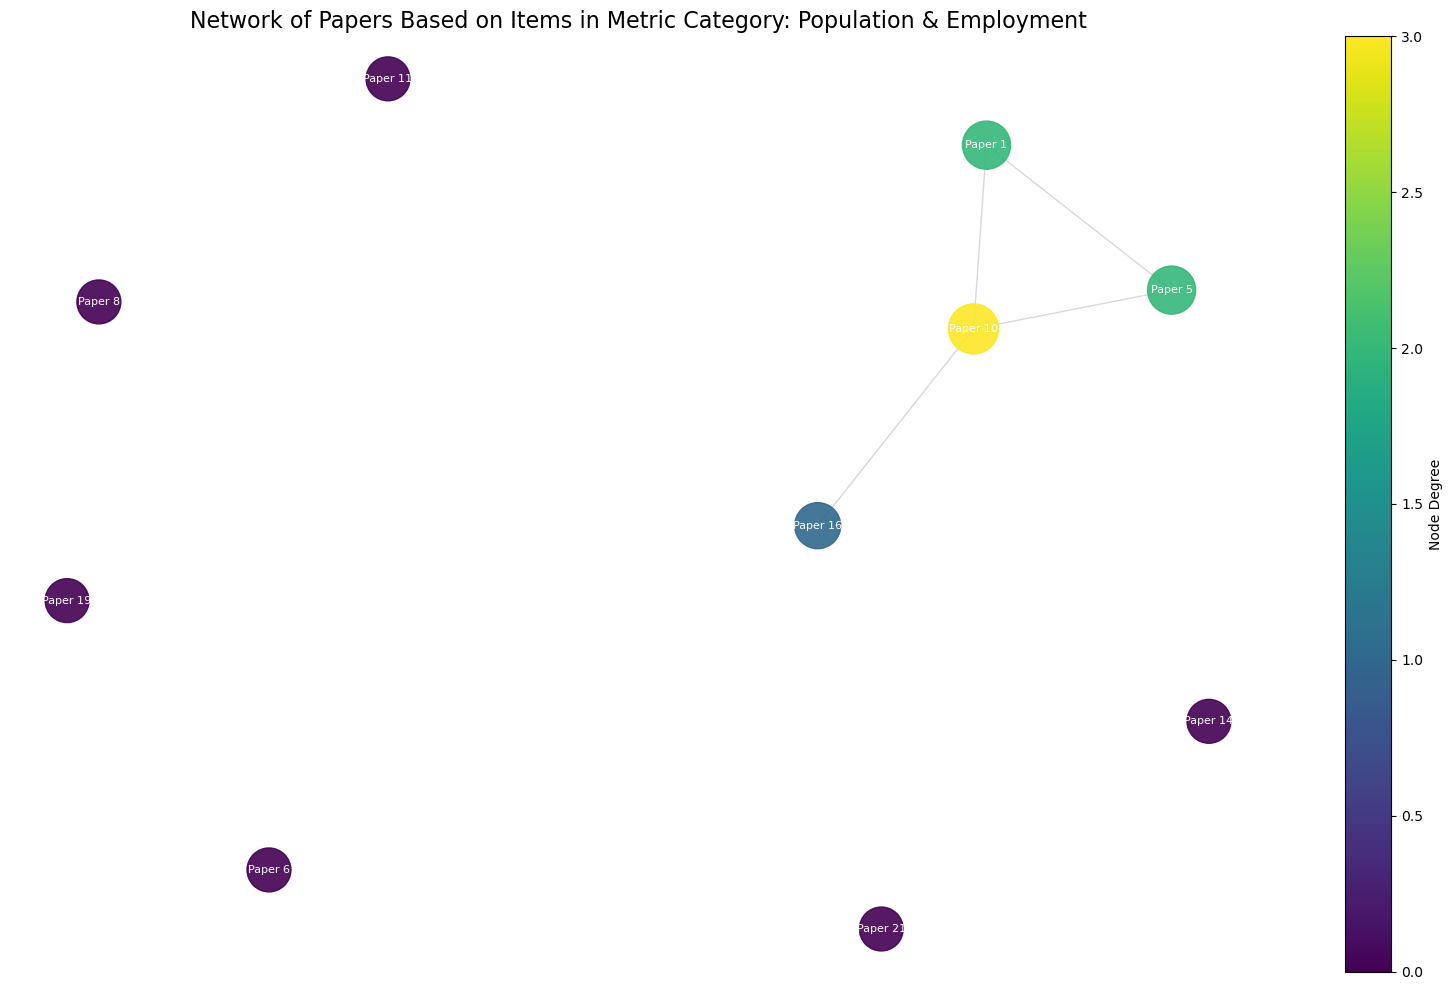

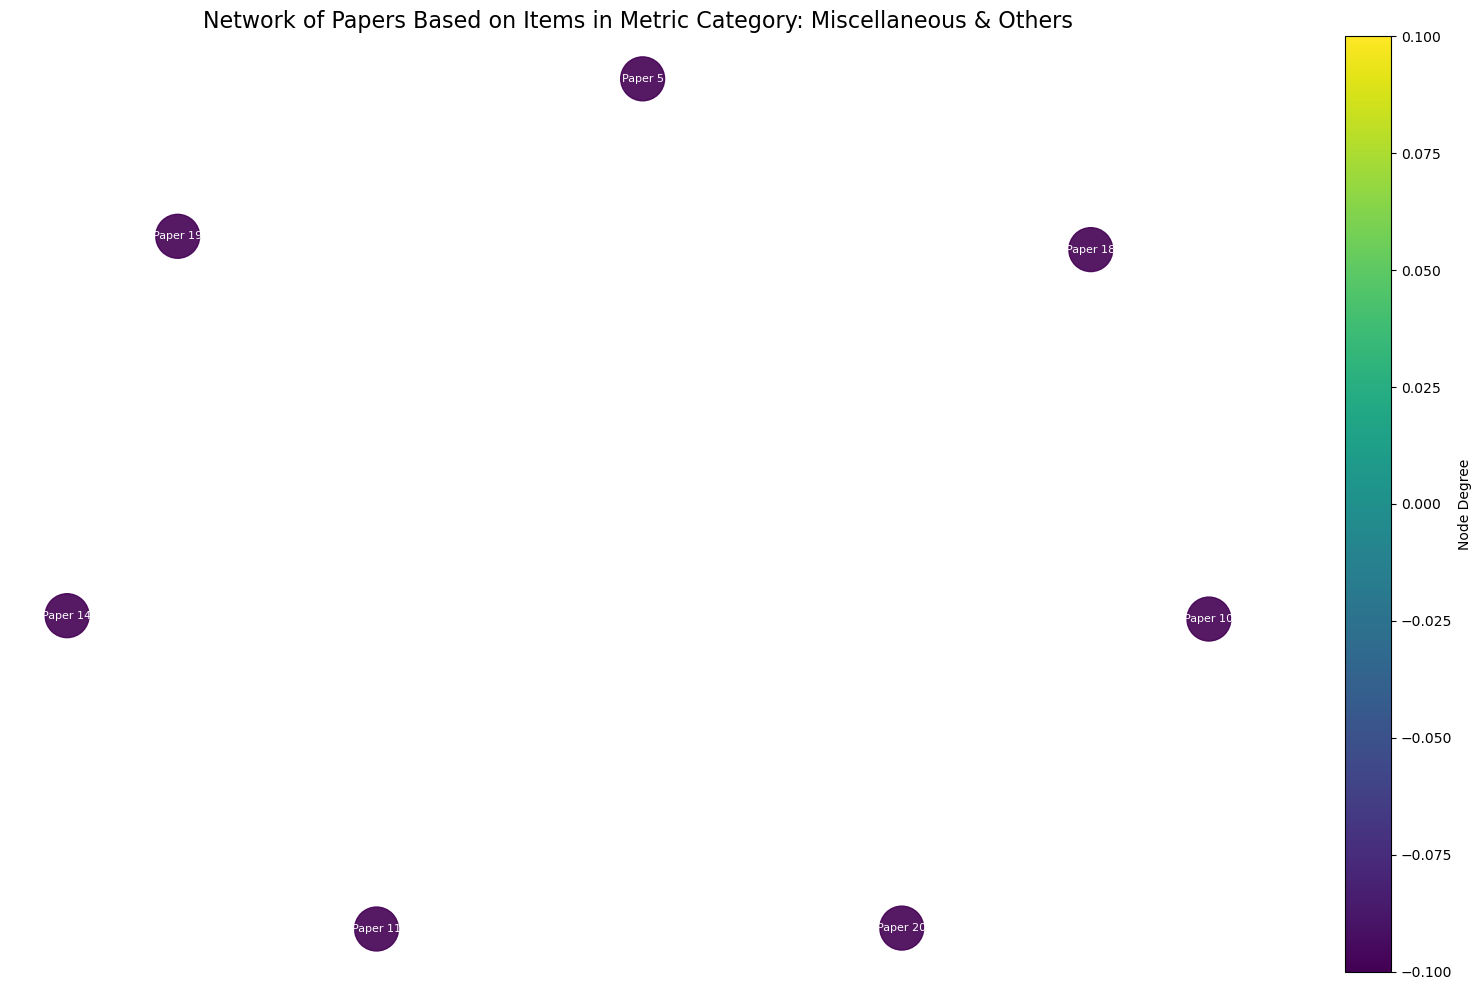

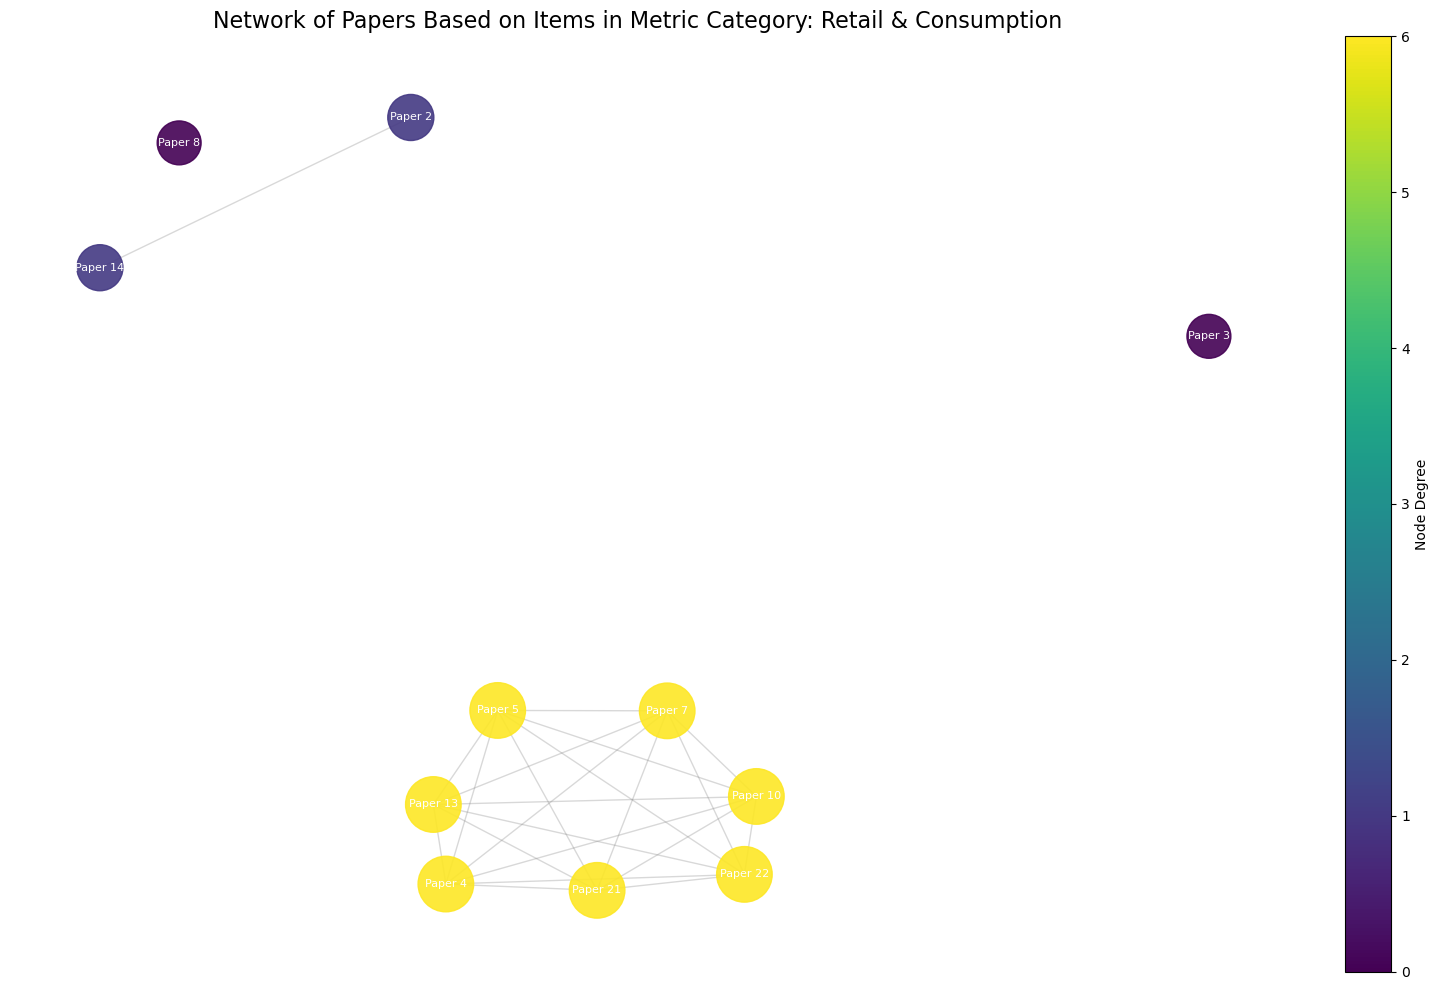

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from community import community_louvain
import yaml

def create_bipartite_graph_for_category(papers, category):
    """Create a bipartite graph of papers and metrics for a specific category."""
    edges = []
    for paper in papers:
        paper_id = paper["id"]
        items = [
            item
            for metric in paper.get("metrics", [])
            if metric["category"] == category
            for item in metric["items"]
        ]
        for item in items:
            edges.append((paper_id, item))

    B = nx.Graph()
    B.add_edges_from(edges)
    return B

def project_graph(B):
    """Project the bipartite graph into a unipartite graph of papers."""
    return nx.bipartite.projected_graph(B, [node for node in B.nodes if isinstance(node, int)])

def visualize_graph(papers_graph, category):
    """Visualize the paper graph with community detection and node coloring."""
    # Apply community detection (Louvain algorithm)
    communities = community_louvain.best_partition(papers_graph)

    # Generate positions for nodes using spring layout
    pos = nx.spring_layout(papers_graph, seed=42, k=5, iterations=300)

    # Calculate node degrees
    degrees = [papers_graph.degree(node) for node in papers_graph.nodes]

    # Normalize the degrees for coloring
    norm = Normalize(vmin=min(degrees), vmax=max(degrees))
    cmap = plt.cm.viridis
    node_colors = [cmap(norm(degree)) for degree in degrees]

    # Scale node sizes by degree
    node_sizes = [1000 + 100 * degree for degree in degrees]

    # Plot the graph
    plt.figure(figsize=(16, 10))

    # Draw edges with transparency
    nx.draw_networkx_edges(papers_graph, pos, alpha=0.3, edge_color="gray")

    # Draw nodes with viridis-based colors
    nx.draw_networkx_nodes(
        papers_graph,
        pos,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.9,
    )

    # Add labels to nodes
    labels = {node: f"Paper {node}" if isinstance(node, int) else node for node in papers_graph.nodes}
    nx.draw_networkx_labels(papers_graph, pos, labels, font_size=8, font_color="white")

    # Add colorbar for the viridis colormap
    fig = plt.gcf()
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=plt.gca(), orientation="vertical")
    cbar.set_label("Node Degree")

    # Adjust plot aesthetics
    plt.title(f"Network of Papers Based on Items in Metric Category: {category}", fontsize=16)
    plt.axis("off")
    plt.tight_layout()

    # Show the plot
    plt.show()

def main():
    """Main function to orchestrate the analysis and plotting."""
    # Step 1: Load YAML file
    with open("cleared_papers.yml", "r") as file:
        data = yaml.safe_load(file)

    papers = data["papers"]

    # Step 2: Iterate over each metric category and create a network
    all_categories = set(
        metric["category"] for paper in papers for metric in paper.get("metrics", [])
    )

    for category in all_categories:
        # Step 3: Create a bipartite graph for this category
        B = create_bipartite_graph_for_category(papers, category)

        # Skip if there are no edges for the category
        if not B.edges:
            continue

        # Step 4: Project the bipartite graph into a unipartite graph of papers
        papers_graph = project_graph(B)

        # Step 5: Visualize graph
        visualize_graph(papers_graph, category)

if __name__ == "__main__":
    main()

In [10]:
import yaml
import pandas as pd

def load_yaml(filename):
    """Load the YAML file and return the list of papers."""
    with open(filename, "r") as file:
        data = yaml.safe_load(file)
    return data.get("papers", [])

def extract_method_categories(methods):
    """
    Extract method categories from the list of methods.
    Returns a semicolon-separated string of method categories.
    """
    categories = [method.get("category", "") for method in methods if "category" in method]
    return "; ".join(categories)

def extract_metric_categories(metrics):
    """
    Extract metric categories from the list of metrics.
    Returns a semicolon-separated string of metric categories.
    """
    categories = [metric.get("category", "") for metric in metrics if "category" in metric]
    return "; ".join(categories)

def extract_timespan(temporal_scope):
    """
    Given a list of years (temporal_scope), return a string showing the start and end.
    If no temporal scope is provided, return "N/A".
    """
    if temporal_scope and len(temporal_scope) >= 2:
        start = temporal_scope[0]
        end = temporal_scope[-1]
        return f"{start} - {end}"
    elif temporal_scope:
        # If only one year is present, show that year.
        return str(temporal_scope[0])
    else:
        return "N/A"

def build_review_table(papers):
    """
    Build a pandas DataFrame suited for a systematic literature review.
    Columns: ID, Author, Method Category, Metric Category, Timespan.
    """
    rows = []
    for paper in papers:
        paper_id = paper.get("id", "")
        authors = ", ".join(paper.get("authors", []))
        method_categories = extract_method_categories(paper.get("methods", []))
        metric_categories = extract_metric_categories(paper.get("metrics", []))
        timespan = extract_timespan(paper.get("temporal_scope", []))
        
        rows.append({
            "ID": paper_id,
            "Author": authors,
            "Method Category": method_categories,
            "Metric Category": metric_categories,
            "Timespan": timespan
        })
    
    return pd.DataFrame(rows)

def main():
    # Load the papers from the YAML file.
    papers_file = "cleared_papers.yml"
    papers = load_yaml(papers_file)
    
    # Build the review table.
    review_table = build_review_table(papers)
    
    # Print the table as plain text.
    print(review_table.to_string(index=False))
    
    # Optionally, export the table to a CSV file:
    # review_table.to_csv("review_table.csv", index=False)

if __name__ == "__main__":
    main()


 ID                                                                                             Author                                                                                          Method Category                                                                                                                                                                                                                               Metric Category    Timespan
  1                                                                    Na Chen, Hongxia Guo, Hui Xiang                                              Weighting Models; Theory-based Methods; Index-based Methods                                                                                                                   Social & Living Standards; Population & Employment; Economic & Investment; Industrial & Structural; Technology & Innovation 2010 - 2020
  2                                                                   Haiyue Fu, Nan